In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/monthly-beer-production-in-austr.csv")

In [3]:
df.head(10)

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
5,1956-06,64.8
6,1956-07,70.1
7,1956-08,77.3
8,1956-09,79.5
9,1956-10,100.6


In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

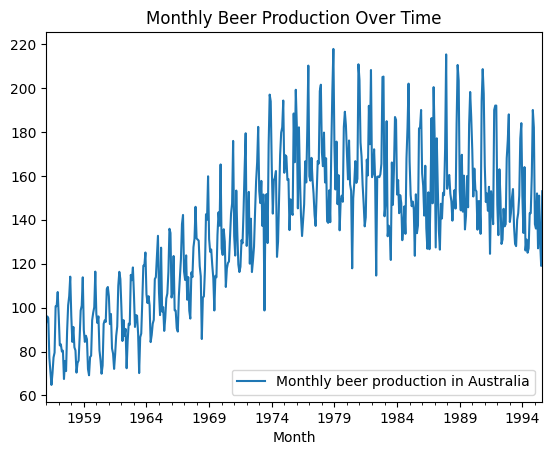

In [7]:
import matplotlib.pyplot as plt


# Step 2: Plot the data
df.plot()
plt.title('Monthly Beer Production Over Time')
plt.show()

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
import seaborn as sns

In [11]:
# Step 3: Fit SARIMA model
model = SARIMAX(df['Monthly beer production in Australia'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))

results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
# Step 4: Forecast
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

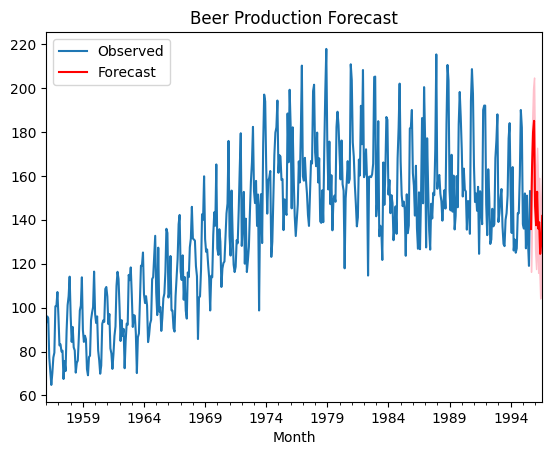

In [13]:
# Plot forecast
df['Monthly beer production in Australia'].plot(label='Observed')
forecast_mean.plot(label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink')
plt.title('Beer Production Forecast')
plt.legend()
plt.show()

In [14]:
# Get forecast values
forecast_values = forecast_mean
conf_int = forecast_conf_int

# Print forecasted values and confidence intervals
print("Forecasted Values:")
print(forecast_values)

print("\nConfidence Intervals:")
print(conf_int)


Forecasted Values:
1995-09-01    135.789565
1995-10-01    163.859807
1995-11-01    179.941766
1995-12-01    185.036074
1996-01-01    146.146455
1996-02-01    137.495469
1996-03-01    152.760283
1996-04-01    136.010883
1996-05-01    138.888786
1996-06-01    124.463908
1996-07-01    129.119899
1996-08-01    141.769999
Freq: MS, Name: predicted_mean, dtype: float64

Confidence Intervals:
            lower Monthly beer production in Australia  \
1995-09-01                                  116.281364   
1995-10-01                                  144.328703   
1995-11-01                                  160.267798   
1995-12-01                                  165.277155   
1996-01-01                                  126.294756   
1996-02-01                                  117.552761   
1996-03-01                                  132.726763   
1996-04-01                                  115.886995   
1996-05-01                                  118.674929   
1996-06-01                     